In [43]:
from standardInclude import *

In [44]:
f = r.TFile("./data/results_lm_27188_27195.root")
#f = r.TFile("./data/gm2offline_full.root")
f.ls()

TFile**		./data/results_lm_27188_27195.root	
 TFile*		./data/results_lm_27188_27195.root	
  KEY: TDirectoryFile	nearlineHistTree;1	nearlineHistTree (CaloNearlineHistograms) folder
  KEY: TDirectoryFile	clusterTree;1	clusterTree (ClusterTree) folder
  KEY: TDirectoryFile	t0Analyzer;1	t0Analyzer (T0PulseProcessorAnalyzer) folder
  KEY: TDirectoryFile	ibmsAnalyzer;1	ibmsAnalyzer (IBMSAnalyzer) folder
  KEY: TDirectoryFile	CoincidenceFinderLM;1	CoincidenceFinderLM (CoincidenceFinderLM) folder
  KEY: TDirectoryFile	FastRotation;1	FastRotation


Warning in <TFile::Init>: no StreamerInfo found in ./data/results_lm_27188_27195.root therefore preventing schema evolution when reading this file.


In [45]:
h = f.Get("CoincidenceFinderLM").Get("clusterTimecaloNumtriple_").Clone()

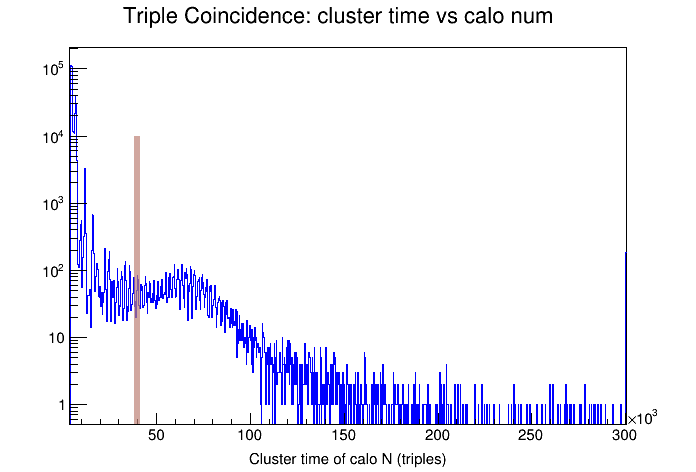

In [66]:
c = r.TCanvas()
hy = h.ProjectionY().Clone()
hy.GetXaxis().SetRangeUser(0,3000*1000/1.25)
hy.Draw()

box1 = r.TBox(48*1000/1.25,0.5,52*1000/1.25,10000)
box1.SetFillColorAlpha(45,0.7)
box1.Draw("same")

c.SetLogy()
c.Draw()

In [67]:
triples = []
for calo in range(1,25):
    bini = h.GetXaxis().FindBin(calo)
    hi = h.ProjectionY("",bini,bini).Clone("triples_"+str(calo))
    hi.SetTitle("Triples in Calo "+str(calo)+"; Cluster Time [c.t.]; N")
    triples.append(hi)

[<ROOT.TH1D object ("triples_1") at 0x7fffc5b59340>, <ROOT.TH1D object ("triples_2") at 0x7fffc5b37a00>, <ROOT.TH1D object ("triples_3") at 0x7fffc5b40e40>, <ROOT.TH1D object ("triples_4") at 0x7fffc5b53d60>, <ROOT.TH1D object ("triples_5") at 0x7fffc5b5a330>, <ROOT.TH1D object ("triples_6") at 0x7fffc5b60560>, <ROOT.TH1D object ("triples_7") at 0x7fffc5b3d450>, <ROOT.TH1D object ("triples_8") at 0x7fffc5b458f0>, <ROOT.TH1D object ("triples_9") at 0x7fffc5b6bdf0>, <ROOT.TH1D object ("triples_10") at 0x7fffc5b577d0>, <ROOT.TH1D object ("triples_11") at 0x7fffc5b6a160>, <ROOT.TH1D object ("triples_12") at 0x7fffc5b97690>, <ROOT.TH1D object ("triples_13") at 0x7fffc5b45010>, <ROOT.TH1D object ("triples_14") at 0x7fffc5b5ac80>, <ROOT.TH1D object ("triples_15") at 0x7fffc5b4b280>, <ROOT.TH1D object ("triples_16") at 0x7fffc5b5b3a0>, <ROOT.TH1D object ("triples_17") at 0x7fffc5b61eb0>, <ROOT.TH1D object ("triples_18") at 0x7fffc5b81c00>, <ROOT.TH1D object ("triples_19") at 0x7fffc5b4ba30>, <

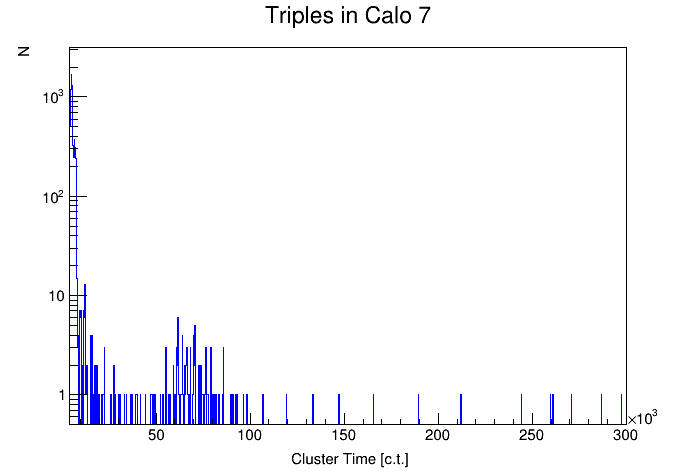

In [68]:
print(triples)
c = r.TCanvas()
triples[6].Draw()
box1.Draw("SAME")
c.SetLogy()
c.Draw()

[<ROOT.TH1D object ("triples_1") at 0x7fffc5b59340>, <ROOT.TH1D object ("triples_2") at 0x7fffc5b37a00>, <ROOT.TH1D object ("triples_3") at 0x7fffc5b40e40>, <ROOT.TH1D object ("triples_4") at 0x7fffc5b53d60>, <ROOT.TH1D object ("triples_5") at 0x7fffc5b5a330>, <ROOT.TH1D object ("triples_6") at 0x7fffc5b60560>, <ROOT.TH1D object ("triples_7") at 0x7fffc5b3d450>, <ROOT.TH1D object ("triples_8") at 0x7fffc5b458f0>, <ROOT.TH1D object ("triples_9") at 0x7fffc5b6bdf0>, <ROOT.TH1D object ("triples_10") at 0x7fffc5b577d0>, <ROOT.TH1D object ("triples_11") at 0x7fffc5b6a160>, <ROOT.TH1D object ("triples_12") at 0x7fffc5b97690>, <ROOT.TH1D object ("triples_13") at 0x7fffc5b45010>, <ROOT.TH1D object ("triples_14") at 0x7fffc5b5ac80>, <ROOT.TH1D object ("triples_15") at 0x7fffc5b4b280>, <ROOT.TH1D object ("triples_16") at 0x7fffc5b5b3a0>, <ROOT.TH1D object ("triples_17") at 0x7fffc5b61eb0>, <ROOT.TH1D object ("triples_18") at 0x7fffc5b81c00>, <ROOT.TH1D object ("triples_19") at 0x7fffc5b4ba30>, <

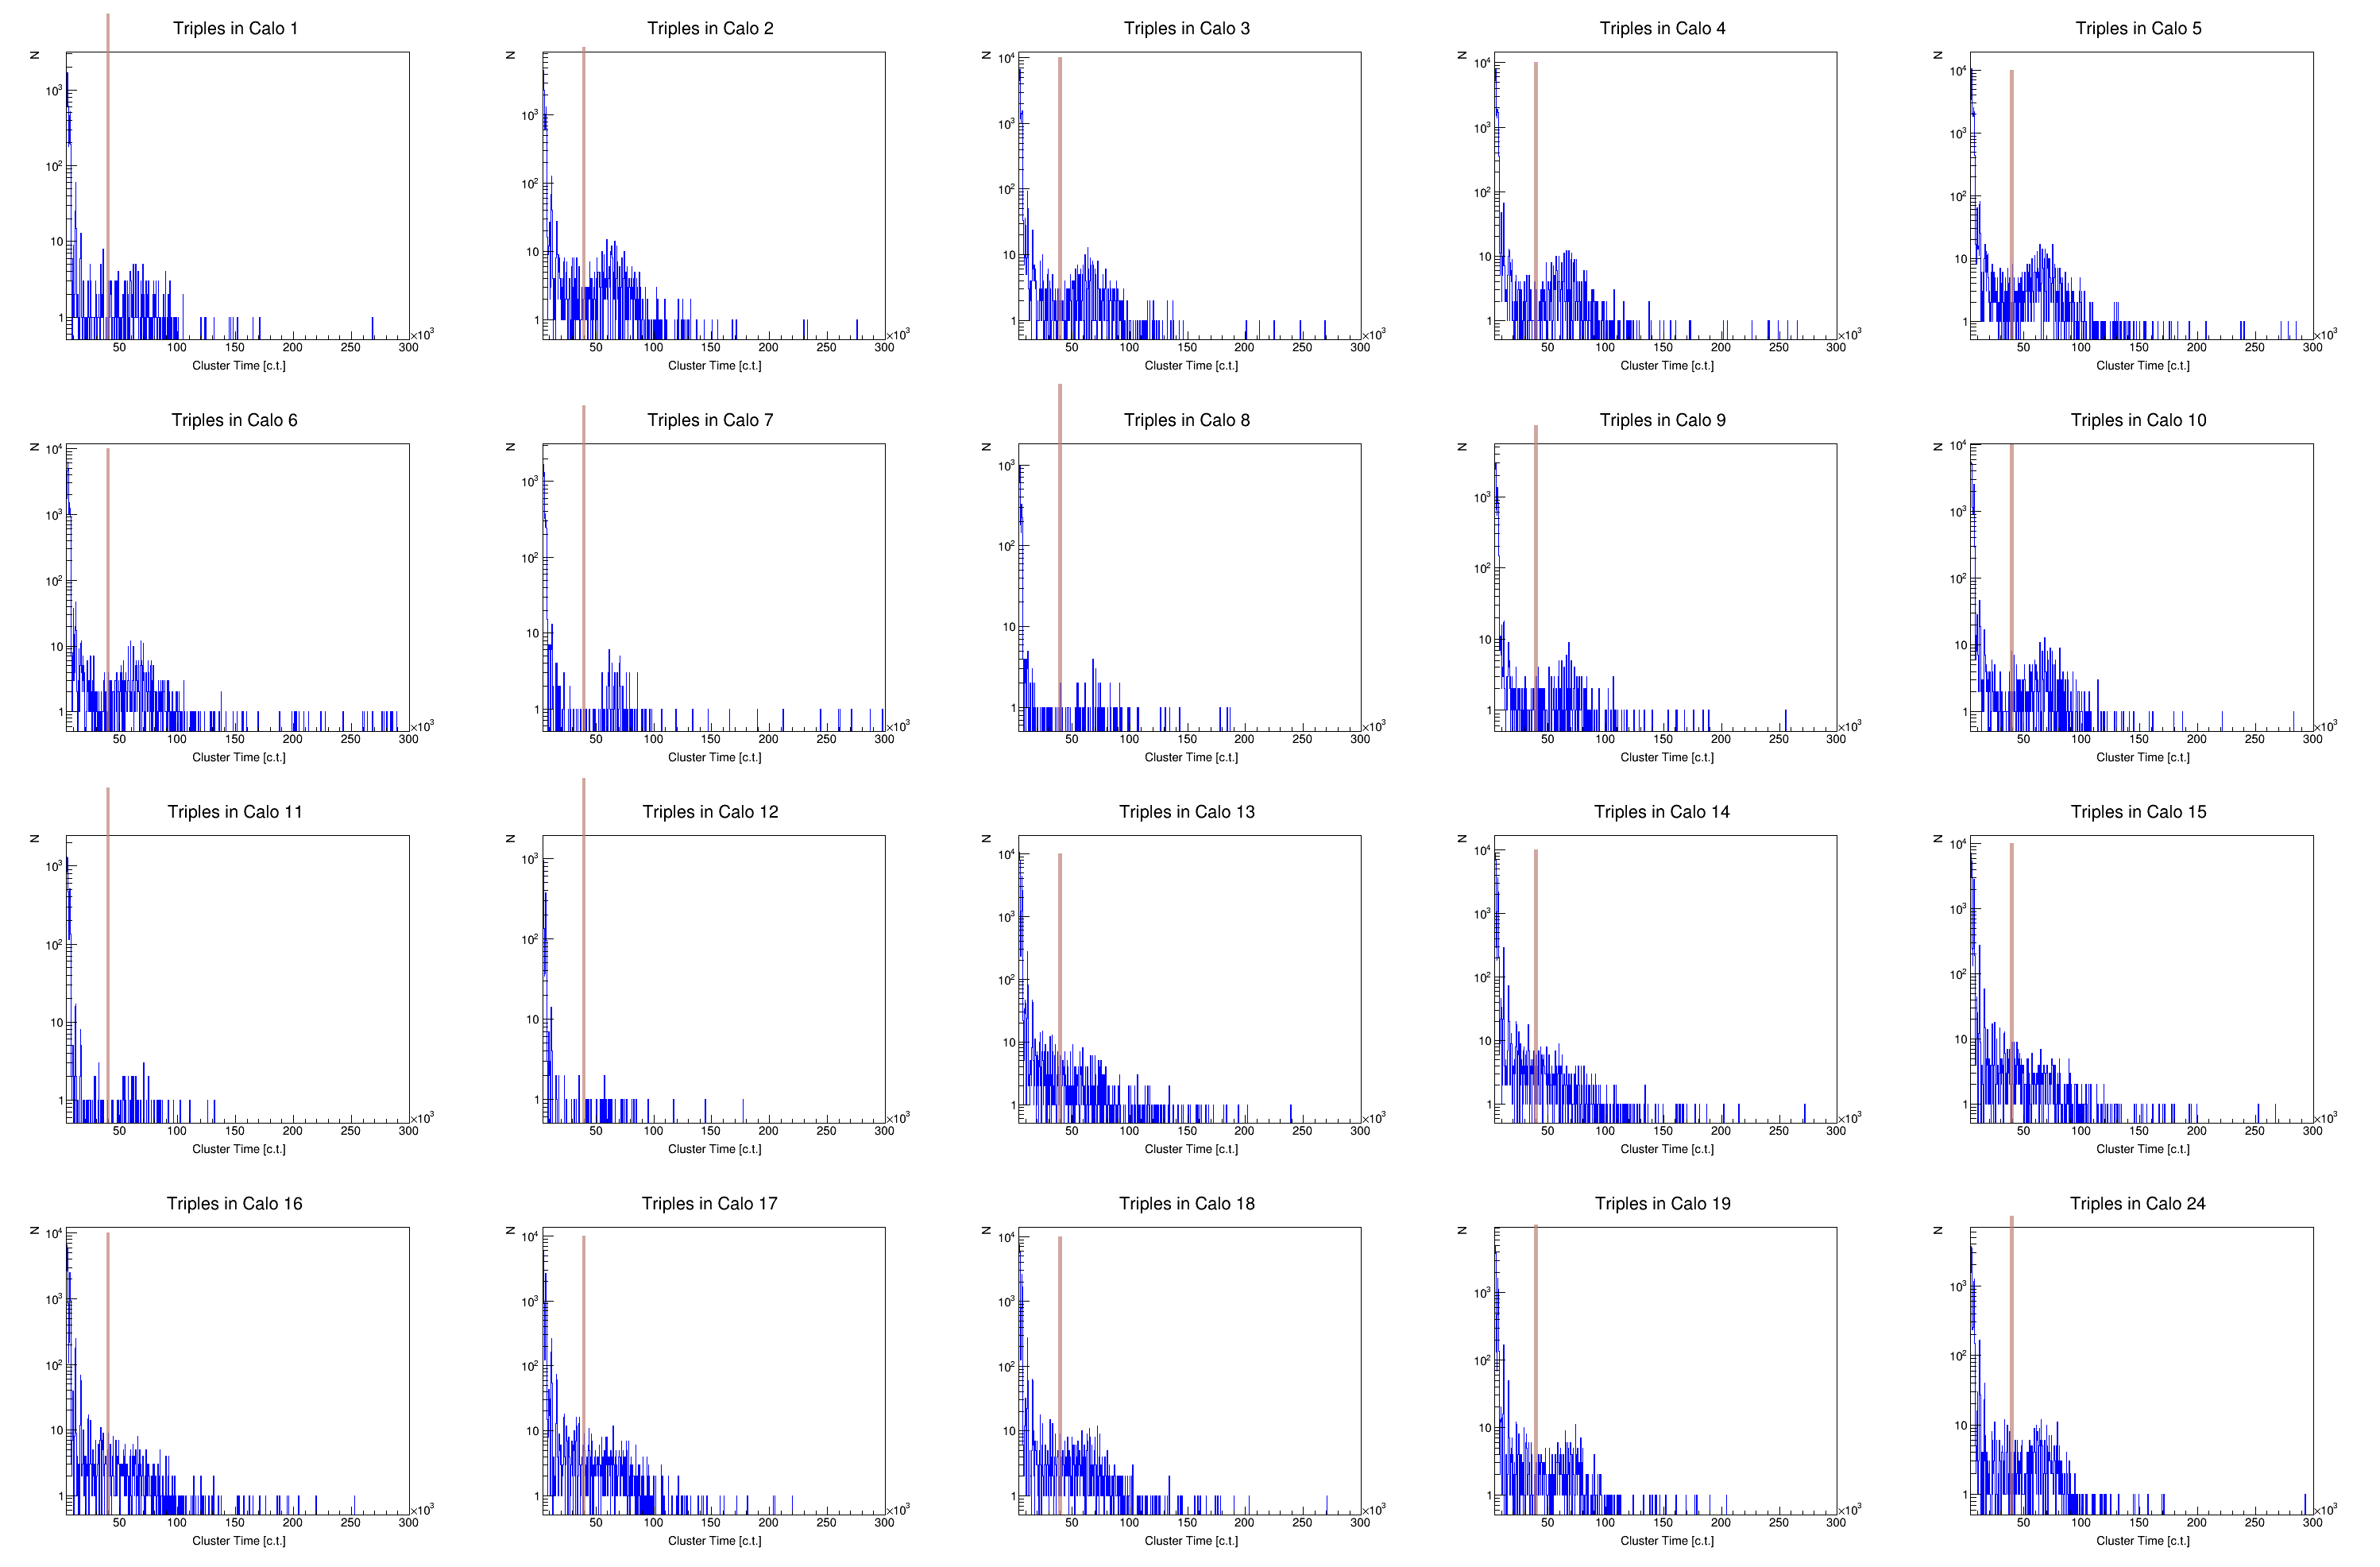

In [69]:
print(triples)
c = r.TCanvas("c","c",3000,2000)
c.Divide(5,4)
for i, hi in enumerate(triples):
    c.cd(i+1)
    triples[i].Draw()
    box1.Draw("SAME")
    r.gPad.SetLogy()
c.Draw()

In [70]:
means = []
for i, hi in enumerate(triples):
    bin1 = hi.GetXaxis().FindBin(30*1000)
    bin2 = hi.GetXaxis().FindBin(40*1000)
    i1 = hi.Integral(bin1,bin2)
    
    bin3 = hi.GetXaxis().FindBin(60*1000)
    bin4 = hi.GetXaxis().FindBin(70*1000)
    i2 = hi.Integral(bin3,bin4)
    
    #print(i1, i2)
    if(i1 > 0):
        means.append((i+1, i1,i2, i2/i1))
    else:
        means.append((i+1, i1,i2, np.nan))

In [38]:
print(means)

[(1, 41.0, 57.0, 1.3902439024390243), (2, 77.0, 144.0, 1.87012987012987), (3, 52.0, 127.0, 2.4423076923076925), (4, 49.0, 130.0, 2.6530612244897958), (5, 73.0, 177.0, 2.4246575342465753), (6, 35.0, 108.0, 3.085714285714286), (7, 9.0, 39.0, 4.333333333333333), (8, 10.0, 15.0, 1.5), (9, 32.0, 59.0, 1.84375), (10, 50.0, 105.0, 2.1), (11, 9.0, 12.0, 1.3333333333333333), (12, 5.0, 5.0, 1.0), (13, 119.0, 63.0, 0.5294117647058824), (14, 125.0, 72.0, 0.576), (15, 130.0, 79.0, 0.6076923076923076), (16, 136.0, 82.0, 0.6029411764705882), (17, 156.0, 96.0, 0.6153846153846154), (18, 143.0, 121.0, 0.8461538461538461), (19, 65.0, 97.0, 1.4923076923076923), (20, 81.0, 105.0, 1.2962962962962963), (21, 57.0, 89.0, 1.5614035087719298), (22, 93.0, 132.0, 1.4193548387096775), (23, 109.0, 144.0, 1.3211009174311927), (24, 91.0, 134.0, 1.4725274725274726)]


In [39]:
calos, i1s, i2s, ratios = zip(*means)

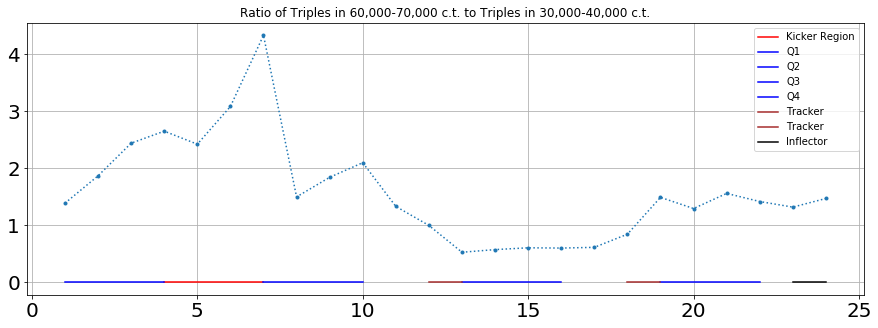

In [40]:
fig,ax = plt.subplots(figsize=(15,5))
plt.plot(calos,ratios,".:")
plt.title("Ratio of Triples in 60,000-70,000 c.t. to Triples in 30,000-40,000 c.t.")
plt.grid()
plotRingComponents(0)
plt.legend()
plt.show()